# Matrix Factorization(MF)기반 추천
추천을 위한 알고리즘에는 크게 `메모리 기반`과 `모델 기반`이 있다. 메모리 기반은 추천이 필요할때마다 데이터를 사용해서 계산을 한후 추천을 진행하는 방식이고 앞에서 설명한 Collaborative Filtering이 대표적인 메모리 기반의 추천이다. 
`모델 기반 추천`은 데이터로부터 모델을 구성한 후에 이 모델만을 저장하고, 실제 추천을 할때는 이 모델을 사용해서 추천을 하는 방식을 말한다. 이번장에서 설명할 Matrix Factorization(MF,행렬요인화)가 모델 기반 추천방식의 대표적인 알고리즘이다.
* 메모리 기반 추천은 모든 데이터를 메모리에 저장하고 있고, 이를 사용해서 계산을 진행하기 때문에 계산시간이 너무 오래걸린다는 단점이 있다. 이에 반해 모델 기반 추천 방식은 모델을 만들어 놓으면 빠른 반응이 가능하다.
* 메모리 기반 추천은 개별 사용자의 데이터에 집중하는 데 비해, 모델 기반 추천은 전체 사용자의 평가 패턴으로부터 모델을 구성하기 때문에, 데이터가 갖는 약한신호도 잘 잡아낼 수 있다. 
    * 데이터가 갖는 약한 신호란 개별 사용자의 행동분석에서는 잘 드러나지 않는 패턴으로, 소수의 사용자가 소수의 영화에 대해서만 특정한 패턴의 평가를 갖을때, 메모리 기반 알고리즘은 이를 잡아내기 쉽지 않지만 모델 기반 추천은 이런 약한 신호도 더 잘 잡아낼 수 있다.

## MF란?
* MF는 평가 데이터 즉, 앞에서 (사용자x아이템)으로 구성된 행렬(**R**)을 2개의 행렬(**P:사용자 행렬**, **아이템 행렬**)로 분해하는 방법이다.
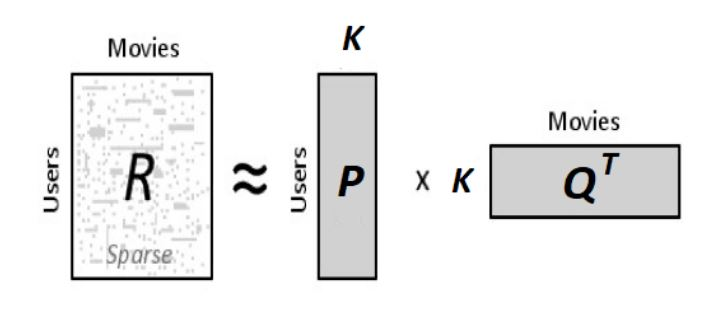
* R(MxN크기) 에는 앞에서 봤다시피 많은 nan값이 있다. 이런 행렬을 P (MxK크기) Q (NxK크기)로 나누는 작업이다.
* 결과적을 $P*Q^T = \hat R$로써 예측값을 내게 한다. 이 $\hat R$을 R과 가까운 행렬이 되도록 P와 Q를 구성하면 이것이 추천을 위한 모델이 된다.
* P와 Q에는 공통으로 갖는 Feature의 Category로써 K개의 잠재요인(latent factor)이 있다
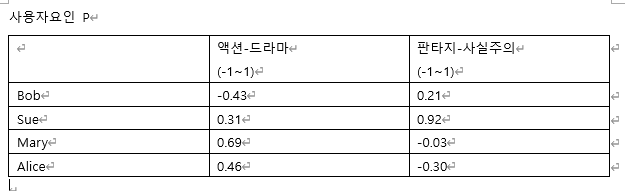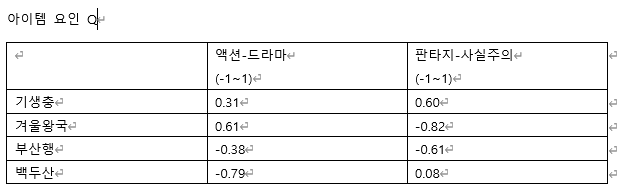
위의 그림에서 영화의 카테고리로 보이는 '액션-드라마'와 '판타지-사실주의'가 latent factor라고 할 수 있다.
* 여기서는 잠재요인이 두가지인 경우를 예시로 들었지만 더 많을 수 있다.
* 이때, -1에 가까울수록 액션에 가까운 성향 1에 가까울수록 드라마에 가까운 성향이다.
* 위의 표를 x축의 범위가 `-1~1` y축의 범위가 `-1~1`인 그래프에 표현할 수 있다.
     * 예를 들어서 다음과 같이 표현할 수 있다.(여기서의 예시는 위에서 말한 영화예시와는 다른 예시 그림이다.)
     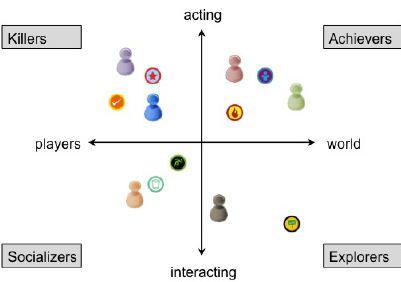
$PxQ^T = \hat R$로써 아래의 결과를 갖는다.
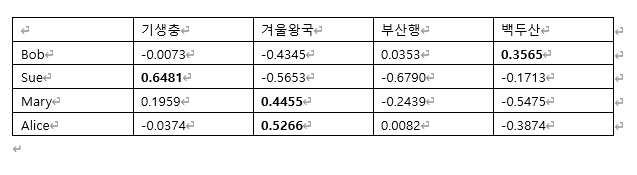

## 그렇다면 P &Q를 구하는 방법은?
* 여기까지 이해했다면 궁금한점이 P와 Q를 구하는 방식이다. 아래와 같은 과정을 따른다.
1. 잠재요인의 개수 K를 정한다. K는 경험에 의해 직관적으로 정해도 되고 다양한 K를 시도해보고 경험적으로 정해도 된다.
2. 주어진 K에 따라서 P,Q행렬을 만든후 랜덤으로 초기화 한다.
3. 주어진 P,Q행렬을 이용해서 $\hat R$을 구한다.
4. R에 **존재하는 실제 평점**에 대해서 $\hat R$과 비교해서 오차를 구하고 이 오차를 토대로 Gradient Descent를 이용해서 P,Q를 수정한다.
5. 전체 오차가 기준값 이하가 되거나, 미리 정해진 반복횟수를 다 채우기 전까지 3으로 돌아가서 반복한다.

* Gradient Descent를 수행할때 과적합을 방지하기 위해서 정규화 항을 추가하는데
    * 내가 여태까지 알던 정규화와 약간 다르게 여기서는 P와 Q가 서로의 가중치 이기 때문에 P와 Q 모두에 대해서 정규화를 진행해준다.

* 이전에 CF를 할때, 사용자마다 점수를 높게 부여하는 사용자 점수를 낮게 부여하는 사용자가 있어서 편차를 사용해서 추천을 했던 것을 기억할 것이다. 이러한 사용자의 경향성(bias)를 따로 계산을 해주어야 한다.
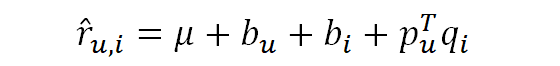
위에서 $μ$는 학습데이터 전체의 평균<br>
$b_u$는 사용자가 가진 편향<br>
$b_i$는 아이템이 가진 편향이다.
아래는 MF에서 bias까지 추가한 목적함수로써 뒤에 정규화항이 적용된것을 볼 수 있다.
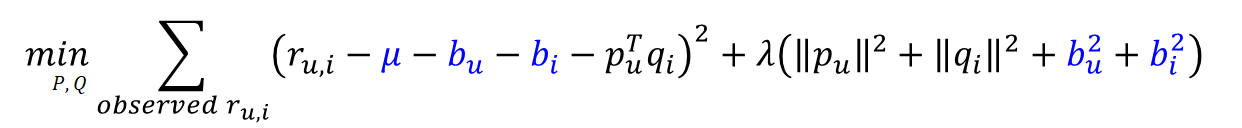
**단, 여기서 주의할 것은 CF에서는 편향이 Fix가 됐지만, MF에서는 오차를 최소화하도록 평가경향을 조정한다.


https://sungkee-book.tistory.com/12 참고

In [1]:
import numpy as np
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', names=r_cols,  sep='\t',encoding='latin-1')
# timestamp 제거
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)            

In [3]:
A = np.array([[0,0,1],[2,3,0]])
idx = np.array([[0,0,1],[2,3,0]]).nonzero()
# (0,2) (1,0) (1,1)이 nonzero임을 보여준다.
A[idx] # 0이아닌 원소들이 뽑힌다.

array([1, 2, 3])

In [4]:
# MF class
class MF():
    def __init__(self, ratings, K, alpha, beta, iterations, verbose=True):
        # Pandas DataFrame형식으로 전달된 평점을 numpy array로 바꿔서 클래스 변수에 저장
        self.R = np.array(ratings) # ratings는 행이 사용자 열이 아이템
        # 사용자 수와 아이템 수를 받아온다.
        self.num_users, self.num_items = np.shape(self.R)
        
        # 파라미터로 받은 수치
        # K: 잠재요인(latent factor)의 수
        # alpha: Learning rate of Matrix P and Q
        # beta: 정규화 계수
        # iteration: SGD의 계산을 할 때의 반복 횟수
        # verbose: SGD의 중간 학습과정을 출력할 것인가
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.verbose = verbose

    # Root Mean Squared Error (RMSE) 계산
    def rmse(self):
        xs, ys = self.R.nonzero() # (xs,ys)의 쌍이 nonzero이다.
        self.predictions = []
        self.errors = []
        for x, y in zip(xs, ys): # 0이아닌 데이터에 대해서 예측을 수행
            prediction = self.get_prediction(x, y)
            self.predictions.append(prediction)
            # 실제 R과 예측사이의 차이를 리스트에 추가
            self.errors.append(self.R[x, y] - prediction) 
        self.predictions = np.array(self.predictions)
        self.errors = np.array(self.errors)
        # error를 제곱 평균내고 루트를 씌운다.
        return np.sqrt(np.mean(self.errors**2))

    def train(self): 
        # Initializing user-feature and item-feature matrix
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        # P와 Q데이터를 초기화 한다.
        
        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        # 사용자의수만큼 bias 벡터화
        self.b_d = np.zeros(self.num_items)
        # 아이템의수만큼 bias 벡터화
        self.b = np.mean(self.R[self.R.nonzero()])
        # ratings array에서 nonzero인 벡터를 상대로 평균을 구한다.

        # List of training samples
        rows, columns = self.R.nonzero()
        # nonzero인 row와 column을 구한후
        self.samples = [(i, j, self.R[i,j]) for i, j in zip(rows, columns)]
        # SGD를 적용할 대상의 인덱스(사용자 i movie_name j)와 평점 튜플을 리스트로 만들어 놓는다.

        # Stochastic gradient descent for given number of iterations
        training_process = []
        # 이곳에 rmse가 얼마나 개선되는지 기록한다.
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse = self.rmse()
            training_process.append((i+1, rmse))
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.4f " % (i+1, rmse))
        return training_process

    # Rating prediction for user i and item j
    def get_prediction(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i, :].dot(self.Q[j, :].T)
        # 사용자 i의 bias 전체적인 movie의 bias 그리고 i번째 user의 행* j번째 movie_name의 열을 곱해서 추정치를 낸다.
        return prediction

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])


In [5]:
R_temp = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
mf = MF(R_temp, K=30, alpha=0.001, beta=0.02, iterations=100, verbose=True)
train_process = mf.train()

Iteration: 10 ; Train RMSE = 0.9585 
Iteration: 20 ; Train RMSE = 0.9374 
Iteration: 30 ; Train RMSE = 0.9281 
Iteration: 40 ; Train RMSE = 0.9225 
Iteration: 50 ; Train RMSE = 0.9184 
Iteration: 60 ; Train RMSE = 0.9144 
Iteration: 70 ; Train RMSE = 0.9096 
Iteration: 80 ; Train RMSE = 0.9031 
Iteration: 90 ; Train RMSE = 0.8939 
Iteration: 100 ; Train RMSE = 0.8821 


## Train/Test 분리 MF알고리즘
* 앞에서 CF에서 Train-Test를 분리할때는 stratify 파라미터를 통해 일정 비율로 값을 분리하였지만 여기서는 sklearn의 shuffle을 통해ㅔ 값을 무작위로 섞게 된다. 따라서 모든 데이터가 Train set이나 Test set 한곳에 다 들어갈 수도 있다.

In [6]:
import numpy as np
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)            # timestamp 제거

In [7]:
from sklearn.utils import shuffle
TRAIN_SIZE = 0.75
ratings = shuffle(ratings, random_state=1)
cutoff = int(TRAIN_SIZE * len(ratings))

ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [19]:
ratings

,user_id,movie_id,rating
43660,508,185,5
87278,518,742,5
14317,178,28,5
81932,899,291,4
95321,115,117,4
...,...,...,...
50057,26,840,2
98047,625,198,4
5192,56,568,4
77708,882,172,5


In [14]:
ratings.T

,43660,87278,14317,81932,95321,5405,33188,63421,72897,9507,...,49100,20609,98448,21440,73349,50057,98047,5192,77708,98539
user_id,508,518,178,899,115,91,6,505,712,271,...,493,219,66,101,796,26,625,56,882,454
movie_id,185,742,28,291,117,682,367,127,94,192,...,405,269,1016,111,516,840,198,568,172,140
rating,5,5,5,4,4,2,2,1,4,5,...,2,5,3,2,4,2,4,4,5,3


In [22]:
class NEW_MF():
    def __init__(self, ratings, K, alpha, beta, iterations, verbose=True):
        self.R = np.array(ratings)
##### >>>>> (2) user_id, item_id를 R의 index와 매핑하기 위한 dictionary 생성
        item_id_index = []
        index_item_id = []
        for i, one_id in enumerate(ratings):
            item_id_index.append([one_id, i])
            # 위아래 코드 아이템 아이디를 인덱스와 양방향 매핑
            index_item_id.append([i, one_id])
        self.item_id_index = dict(item_id_index)
        self.index_item_id = dict(index_item_id)        
        user_id_index = []
        index_user_id = []
        for i, one_id in enumerate(ratings.T):
            user_id_index.append([one_id, i])
            # 위아래 코드 유저 아이디를 인덱스와 양방향 매핑
            index_user_id.append([i, one_id])
        self.user_id_index = dict(user_id_index)
        self.index_user_id = dict(index_user_id)
#### <<<<< (2)
        self.num_users, self.num_items = np.shape(self.R)
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.verbose = verbose

    # train set의 RMSE 계산
    def rmse(self):
        xs, ys = self.R.nonzero()
        self.predictions = []
        self.errors = []
        for x, y in zip(xs, ys):
            prediction = self.get_prediction(x, y)
            self.predictions.append(prediction)
            self.errors.append(self.R[x, y] - prediction)
        self.predictions = np.array(self.predictions)
        self.errors = np.array(self.errors)
        return np.sqrt(np.mean(self.errors**2))

    # Ratings for user i and item j
    def get_prediction(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

##### >>>>> (3)
    # Test set을 선정
    def set_test(self, ratings_test):
        test_set = []
        for i in range(len(ratings_test)):      # test 데이터에 있는 각 데이터에 대해서
            x = self.user_id_index[ratings_test.iloc[i, 0]]
            y = self.item_id_index[ratings_test.iloc[i, 1]]
            z = ratings_test.iloc[i, 2]
            test_set.append([x, y, z])
            # Setting test set ratings to 0
            self.R[x, y] = 0 # R을 이용해서 모델을 학습하기 때문에 Test set에 해당하는 데이터는 지운다.
        self.test_set = test_set
        return test_set # Return test set

    # Test set의 RMSE 계산
    def test_rmse(self):
        error = 0
        for one_set in self.test_set:
            predicted = self.get_prediction(one_set[0], one_set[1])
            error += pow(one_set[2] - predicted, 2)
        return np.sqrt(error/len(self.test_set))
    
    ## Training 하면서 test set의 정확도를 계산 ##
    
    def test(self):
        # Initializing user-feature and item-feature matrix
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        # user명수에 대한 zero vector 생성
        self.b_d = np.zeros(self.num_items)
        # item갯수에 대한 zero vector 생성
        self.b = np.mean(self.R[self.R.nonzero()])
        # 전체 item에 대한 평균 확인

        # List of training samples
        rows, columns = self.R.nonzero()
        # test set에 대한 아이템은 zero화 시켰으므로 nonzero인 element에 대해서 행과 열을 출력
        self.samples = [(i, j, self.R[i,j]) for i, j in zip(rows, columns)]
        # Train Sample을 뽑아낸다.
        
        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            # Train Sample을 섞음
            self.sgd()
            # Train Sample에 대한 가중치들 업데이트
            rmse1 = self.rmse()
            rmse2 = self.test_rmse()
            training_process.append((i+1, rmse1, rmse2))
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.4f ; Test RMSE = %.4f" % (i+1, rmse1, rmse2))
        return training_process

    # Ratings for given user_id and item_id
    # 주어진 user_id와 item_id에 대해서 예측치를 계산
    def get_one_prediction(self, user_id, item_id):
        return self.get_prediction(self.user_id_index[user_id], self.item_id_index[item_id])

    # Full user-movie rating matrix
    
    def full_prediction(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_d[np.newaxis,:] + self.P.dot(self.Q.T)
    # 사용자가 N명 아이템이 M명이라 하자.
    # np.newaxis를 통해 bias들을 matrix로 만드는데 사용자의 평가성향은 (N,1) 사이즈로 만들고
    # 아이템의 평가성향은 (1.M) 사이즈로 만들게 된다. 따라서 각각의 사용자의 평가성향이 아이템의 평가성향과 브로드캐스팅을 통해 합산
    # 결과적으로 만들어지는 사이즈는 (N,M)
    # P matrix와 Q matrix의 곱으로 만들어지는 행렬의 크기 또한 (N,M)

In [20]:
# 참고
# A = np.array([1,2,3,4])
# B = np.array([2,3,4,5])
# A[:,np.newaxis] + B[np.newaxis,:]

array([[3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8],
       [6, 7, 8, 9]])

In [23]:
R_temp = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
mf = NEW_MF(R_temp, K=30, alpha=0.001, beta=0.02, iterations=100, verbose=True)
test_set = mf.set_test(ratings_test)
result = mf.test()

# Printing predictions
print(mf.full_prediction())
print(mf.get_one_prediction(1, 2))

Iteration: 10 ; Train RMSE = 0.9659 ; Test RMSE = 0.9834
Iteration: 20 ; Train RMSE = 0.9409 ; Test RMSE = 0.9644
Iteration: 30 ; Train RMSE = 0.9297 ; Test RMSE = 0.9566
Iteration: 40 ; Train RMSE = 0.9230 ; Test RMSE = 0.9523
Iteration: 50 ; Train RMSE = 0.9182 ; Test RMSE = 0.9496
Iteration: 60 ; Train RMSE = 0.9142 ; Test RMSE = 0.9477
Iteration: 70 ; Train RMSE = 0.9104 ; Test RMSE = 0.9462
Iteration: 80 ; Train RMSE = 0.9062 ; Test RMSE = 0.9448
Iteration: 90 ; Train RMSE = 0.9010 ; Test RMSE = 0.9432
Iteration: 100 ; Train RMSE = 0.8941 ; Test RMSE = 0.9411
[[3.81136876 3.41230228 3.06026219 ... 3.33846589 3.50894518 3.49933482]
 [3.93649233 3.49066284 3.1445851  ... 3.4348288  3.54913684 3.54476906]
 [3.32931408 2.89104073 2.53926716 ... 2.84000521 2.92767568 2.93935053]
 ...
 [4.19905217 3.78031801 3.42230963 ... 3.71318466 3.82553688 3.82139224]
 [4.35277797 3.90223923 3.54681408 ... 3.83234713 3.94332097 3.94377294]
 [3.77429692 3.36746019 3.01455928 ... 3.28357993 3.4284726

#  SVD와 MF
특잇값분해
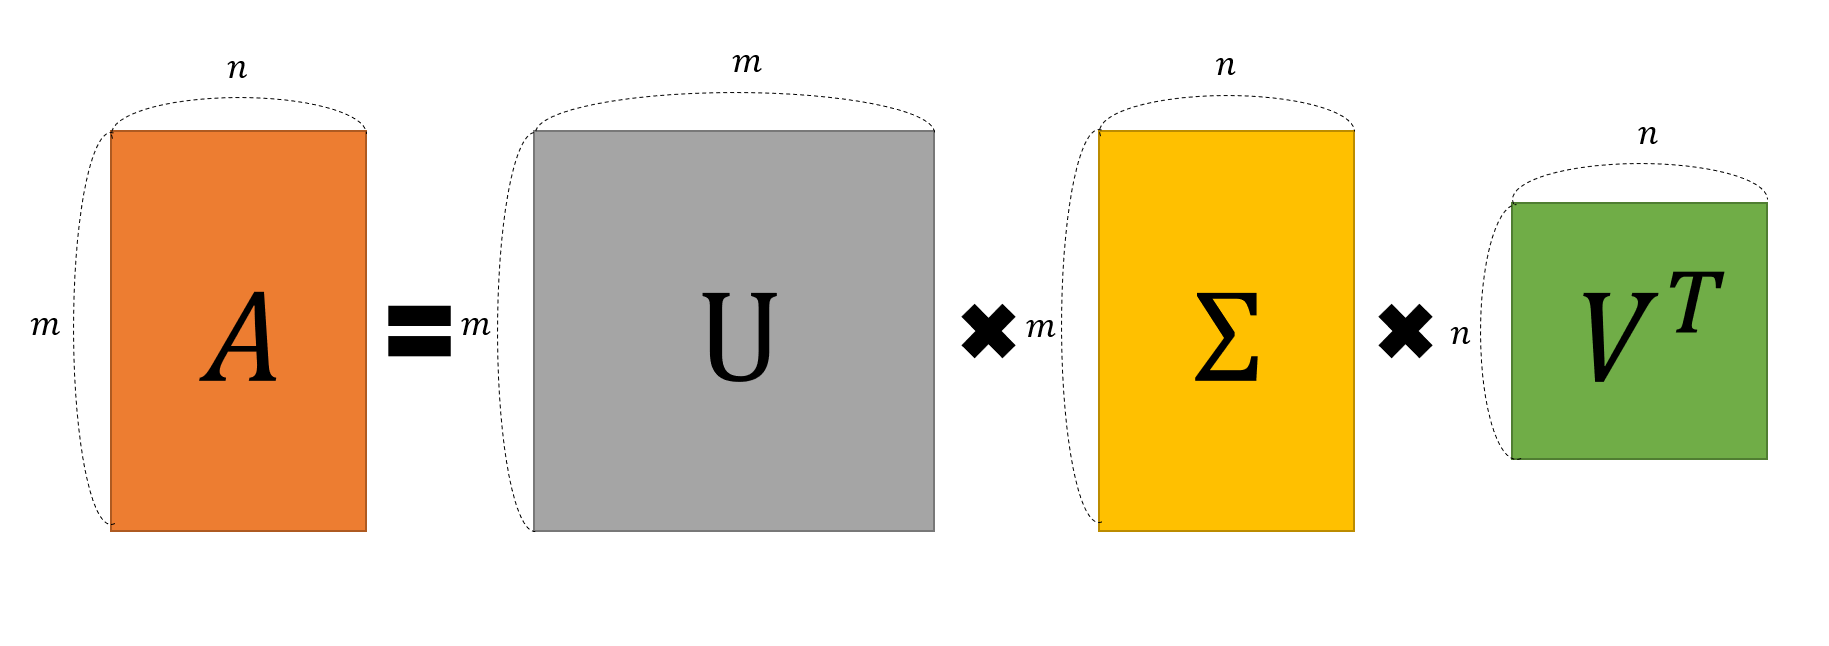
는 한마디로 말해 데이터를 3개의 행렬로 분해해서 이를 학습 시키고 이 3개의 행렬로 원래의 행렬을 재현하고자 하는 기법이다. <br>
하지만 특잇값 문해는 원래 행렬에 없는 값을 예측하는 데에는 문제가 있다.<br>
그 이유는 원래 행렬에 Null값을 허용하지 않기 때문이다. 이 말이 무슨 말이냐면, SVD는 원래 행렬 전체를 기준으로 3개의 행렬을 최적화를 수행하고 이와 달리 MF는 Null값이 아닌 `값`들을 이용해서 두개의 행렬을 최적화 한다.<br>
따라서 만약 MF처럼 Null값을 0으로 처리한후 행렬을 재현해보면 0이었던 원소는 모두 0에 가깝게 재현되고
* MF의 경우에는 P,Q학습과정에서 0인값은 빼고 계산을 진행하기 때문에 Null값없이 학습이 된다고 보는 것이다. MF는 이렇게 P와 Q를 학습시켜 <br> 원래 Null 값이였던 곳도 상당히 잘 예측하는 것을 알 수 있다.